### iCESM VOLC Average Tutorial

##### For this tutorial we will be using CMIP6 data to construct a regional average plot of the air surface temperature over time in New York City

#### __Step 1. Install and Import Packages__

##### Let's start in the __terminal__ and install "__cfTime__" which allows us to read our NetCDF files more efficiently

In [1]:
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
current_day =  now.strftime("%D")
print("Today's Date is:", current_day)
print("Current Time is :", current_time)

Today's Date is: 10/25/24
Current Time is : 19:26:31


##### Next install these packages in your __terminal__ if not already installed

Great! The needed packages for our time series graph are installed in the terminal, lets quickly import them into our jupiter python notebook¶

In [2]:
import netCDF4
from netCDF4 import Dataset as nc
from netCDF4 import num2date

In [3]:
import xarray as xr
import numpy as np
#import cftime
import pandas as pd
from numpy import *
from scipy import stats
import datetime
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt #python plotting package
from matplotlib import cm
import matplotlib.colors as mcolors
#from colorspacious import cspace_converter
from collections import OrderedDict
cmaps = OrderedDict()
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#import nctoolkit
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cpf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely import geometry
from collections  import namedtuple
from shapely.geometry.polygon import LinearRing
from shapely.geometry.polygon import Polygon

##### What are we installing and importing exactly?
- ##### `pandas` is a data manipulation and analysis library that will be used to provide data structures like DataFrame
- ##### `matplotlib` is a plotting library that will be used to plot maps and geospatial data
- ##### `xarray` can read and write NetCDF files
- ##### `numpy` is used for working with arrays and will help us create our custom x-axis

#### __Step 2. Set the path to your NetCDF file__
- ##### The download of a NetCDF file off the ESGF website was shown previously in tutorial previously shown
- ##### We’ll use the `xr.open_dataset()` function from xarray to open the NetCDF file.
- ##### This function reads the file and loads it into an xarray.Dataset object and allows for easy manipulation and analysis of the data.

## Create vartiables to plot pwc timeseries

In [41]:
# CESM converting month 01 to January 
from itertools import product
from cftime import DatetimeNoLeap
year = np.linspace(0,1872, 1872) 
dates = [DatetimeNoLeap(year, month, 1) for year, month in product(range(1850, 2006), range(1, 13))]
da = xr.DataArray(np.arange(1872), coords=[dates], dims=['time'], name='time')
i_cntlyear = np.linspace(0,12000, 12000) 
i_cntldates = [DatetimeNoLeap(i_cntlyear, month, 1) for i_cntlyear, month in product(range(650, 1650), range(1, 13))]
i_cntlda =xr.DataArray(np.arange(12000), coords=[i_cntldates], dims=['time'], name='time')

In [43]:
len(i_cntlda)

12000

In [10]:
## Function to read in xarrays
def dsload(e,var):
    array =[]
    for i in range(len(e)):
        file = xr.open_dataset(filepath+ var+e[i]+'.nc').squeeze()
        filen = file.assign_attrs(forcing = e[i], variable = var)
        #xrda = filen.to_dataarray()
        test = filen.to_dataarray()
        clean =(test[0])
        array.append(clean)
        ds = array
    return ds[0], ds[1],ds[2]#,ds[3]

In [11]:
# Reading in Files 
filepath = '/glade/u/home/calipfleger/stats/PWC_Paper/cesmlme_'
#vars =['PSL', 'TS', 'PRECT', 'd18O', 'dD', 'OMEGA', 'U', 'V']
forcings = ['full', 'volc', 'cntl']  ##, '_picntl']

In [12]:
%%time
var_full, var_volc, var_cntl= dsload(forcings, 'PRECT')

CPU times: user 223 ms, sys: 378 ms, total: 601 ms
Wall time: 599 ms


# Read in Precipitation Files: Total Precipitation (PRECT)

#### __Step 3. Print our NetCDF file__
- ##### Use the `print()` function
- ##### file is labeled "var_full and var_volc"

In [13]:
print(var_full)

<xarray.DataArray (ensemble: 16, time: 1872, lat: 36, lon: 87)>
array([[[[1.45361400e+00, 1.39101291e+00, 1.31174493e+00, ...,
          1.31700069e-01, 2.15565369e-01, 1.02078664e+00],
         [1.08961844e+00, 9.00239348e-01, 8.57451379e-01, ...,
          7.34060109e-02, 1.11082532e-01, 7.05556631e-01],
         [9.00755644e-01, 8.79482388e-01, 8.25707972e-01, ...,
          4.53549437e-02, 3.63080874e-02, 1.81807542e+00],
         ...,
         [4.35132459e-02, 4.65638898e-02, 1.97535336e-01, ...,
          4.58763027e+00, 5.18924999e+00, 5.76024151e+00],
         [3.52860652e-02, 2.91289300e-01, 3.20669866e+00, ...,
          4.54150772e+00, 5.55601978e+00, 5.78985977e+00],
         [5.24140179e-01, 1.78559458e+00, 1.31821311e+00, ...,
          3.82814121e+00, 5.42529106e+00, 6.17663717e+00]],

        [[1.67036855e+00, 1.43667293e+00, 9.62148845e-01, ...,
          6.76312447e-02, 1.25085667e-01, 1.23829937e+00],
         [1.72400451e+00, 1.11484551e+00, 9.62325752e-01, ...,
   

# Create vartiables to plot pwc timeseries

In [14]:
## Get the lengths of lat, lon and time
nlon=len(var_full.lon)
nlat=len(var_full.lat)
ntime=len(var_full.time)
time = var_full.time
lon = var_full.lon
lat = var_full.lat
tlen = len(var_full)
dt = 1/12  # In years
t_post = np.arange(0,1872)*dt +1850
t_seas= np.arange(0, 157) +1850 
da = xr.DataArray(np.arange(1872), coords=[dates], dims=['time'], name='time')
year = np.linspace(0,1872, 1872) 

In [15]:
## Create time variables to calculate annual mean SLP
mo=12
yr=ntime//mo
post_yr = ntime//mo
post_year=linspace(1850,2005,156)

## Plotting Parameters 

In [16]:
# Set for each variable
variable = 'Total Precipitation Mean State'
climt = ' Mean State'
unit = ' mm/day'
plt_ylabel = "Total Precipitation (mm/day)"
vari ='/PRECT'

In [17]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
var_name = ['Full Forcing', 'Volcanic']

colors = ['green', 'black']
colors_ribbon = ['lightgreen' ,'lightgrey']
var_namets = ['Full Forcing', 'Volcanic']
var_names = ['DJF', 'MAM', 'JJA', 'SON']#, 'ANTHRO']'LULC'

In [18]:
## Make geom for E and W PWC index boxes
Elats = [-5, -5, 5, 5]
Elons = [90, 150, 150,90]
Ering = LinearRing(list(zip(Elons, Elats)))
Wlats = [-5, -5, 5, 5]
Wlons = [-150,-90,-90,-150]
Wring = LinearRing(list(zip(Wlons, Wlats)))

# Calculate Anomalies and Mean State Climatology

In [19]:
## Climatology Definition 
def clim(c): 
    clim_var = c.groupby('time.month').mean('time')
    anom_var = c.groupby('time.month') - clim_var
    anom_var= anom_var.compute()
    return anom_var

In [20]:
#%%time
## climatology realtive to the anomaly 
#anom_full = clim(var_full)
#anom_volc = clim(var_volc)
#anom_cntl =clim(var_cntl)

In [21]:
def ms(c):
    v = c.mean(dim = 'time')
    sd = c.std(dim = 'time')
    z = (c-v)/sd
    #zz = z.mean(dim = 'ensemble')
    return z

In [31]:
%%time
anom_full = ms(var_full)
anom_volc = ms(var_volc)
anom_cntl =ms(var_cntl)

CPU times: user 1.05 s, sys: 440 ms, total: 1.49 s
Wall time: 1.48 s


# Function for Regional Average

In [56]:
#PWC Index 
def pwci(p):
    #p = c.groupby('time.month').mean('time')
    east=  p.sel(lat=slice(-5,5), lon=slice(180,260))  # 
    west = p.sel(lat=slice(-5,5), lon=slice(130,150))
    avg_east = east.mean(('lat', 'lon'))
    avg_west = west.mean(('lat', 'lon'))
    pwc = (avg_east - avg_west).compute()
    pwc= pwc.compute()
    return pwc, avg_east, avg_west

In [57]:
%%time
pwc, pwc_fw, pwc_fw = pwci(anom_full)
pwc_v, pwc_ve, pwc_ve  = pwci(anom_volc)
cntl, cntl_e,cntl_w = pwci(var_cntl)

CPU times: user 69 ms, sys: 4.06 ms, total: 73 ms
Wall time: 72.6 ms


# Time Series

In [58]:
t_oza = np.arange(0,1872)*dt +1850
def roll_post(r,vp):
    fig = plt.figure(figsize=(25,10))
    for i in range(len(r)):
        #ax = fig.add_subplot(6,1,i+1)
        bbres = r[1].mean(dim = 'ensemble')
        post = r[i].mean(dim = 'ensemble')
        bres = stats.linregress(t_oza,bbres)
        res = stats.linregress(t_oza,post)
        roll_avg = post.rolling(time=120, center=True).mean()
        #plt.set_title(var_name[i]) #ax
        plt.suptitle(variable +vp , fontsize = 35, y= 1)
        #plt.set_ylim([-2,.2]) #ax
        plt.ylim(-1,1)
        plt.plot(t_oza,roll_avg, label = var_namets[i], color = colors[i], linewidth=4)
        plt.plot(t_oza, (bres.intercept + bres.slope*t_oza), 'r', linewidth=3)
        plt.fill_between(t_oza, roll_avg + roll_avg.std(),
                         roll_avg - roll_avg.std(), edgecolor= colors_ribbon[i], 
                         facecolor=colors_ribbon[i], alpha=1)
        plt.ylim(-0.4,0.4)
        plt.text(2018, 0, 'slope, %0.3f' %bres.slope, fontsize = '24')
        plt.text(2018, - .1, 'pvalue, %0.3f' %bres.pvalue, fontsize = '24')
        plt.ylabel(plt_ylabel)
        plt.xlabel('Year')
        plt.rcParams['font.family']= 'sans-serif'
        plt.rcParams['font.size'] = '30'
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
              fancybox=True, shadow=True, ncol=4)
        #plt.tight_layout()
        plt.xlabel('Year', fontsize = '38')
        #plt.xticks(np.linspace(1850, 2005, 10))
        #plt.xticks(ticks=True, labels=None,  minor=True)
        plt.savefig(variable + "ts10.jpg")

In [59]:
pwc_in= [pwc,pwc_v]

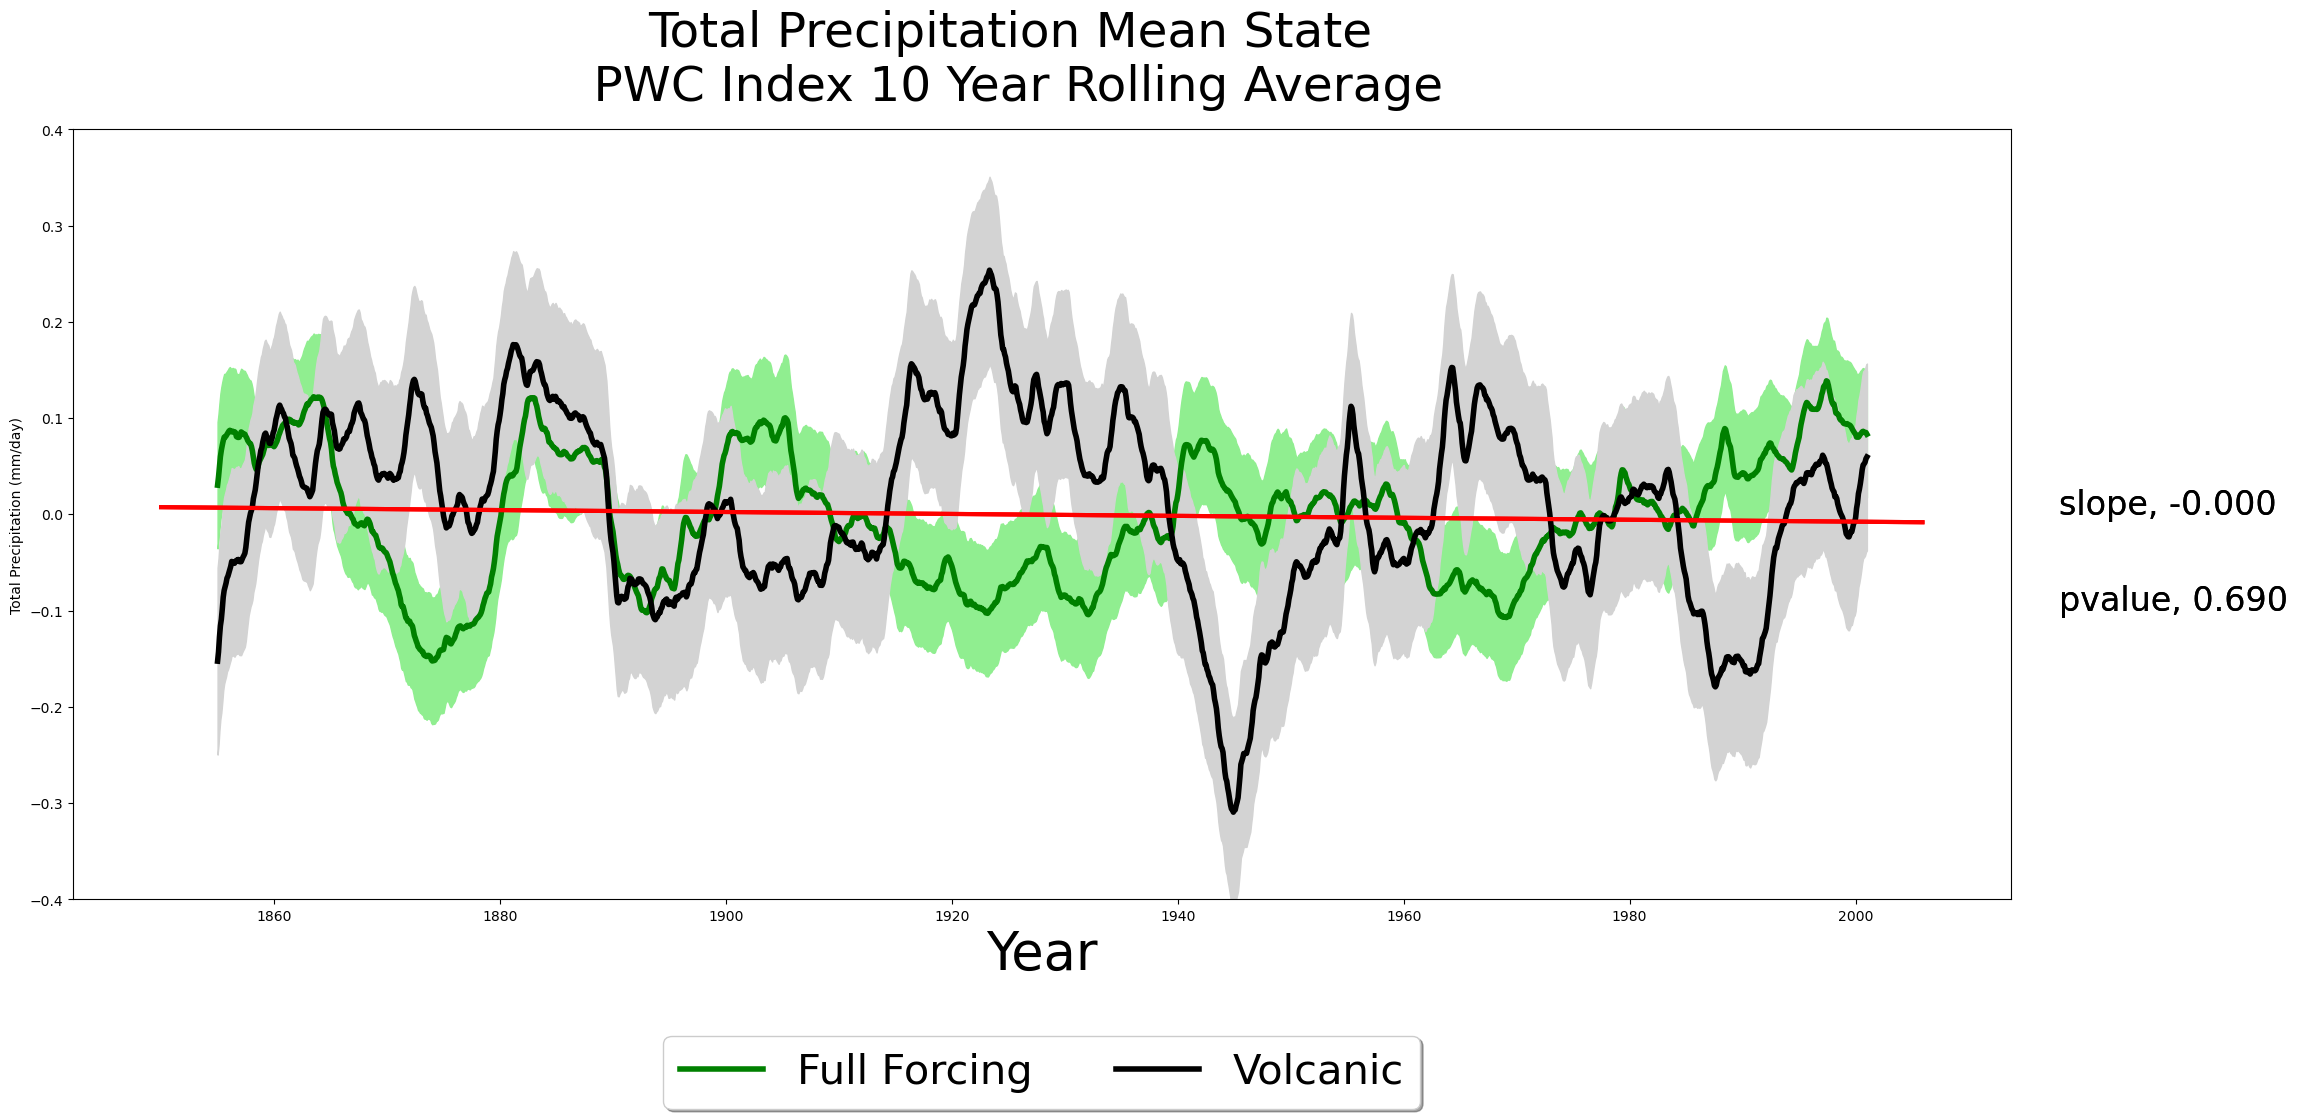

In [60]:
#for i in range(len(pwc_in)):
vp =  '\n PWC Index 10 Year Rolling Average'
roll_post(pwc_in, vp)